## Analizador Lexico
Un analizador lexico transforma una entrada en tokens

In [44]:
entrada = "Si si es de dia entonces mañana no es de noche"

In [45]:
#tokens = entrada.lower().split()
#tokens

In [46]:
from enum import Enum

class TipoToken(Enum):
    O = 1
    Y = 2
    S = 3
    N = 4
    E = 5
    P = 6

In [47]:
def analizador_lexico(entrada : str) -> list:
    tokens = entrada.lower().split()
    lexemas = []
    for token in tokens:
        if token == 'o':
            lexemas.append({"valor" : token , "tipo": TipoToken.O })
        elif token == 'y':
            lexemas.append({"valor" : token , "tipo": TipoToken.Y})
        elif token == 'si':
            lexemas.append({"valor" : token , "tipo": TipoToken.S})
        elif token == 'entonces':
            lexemas.append({"valor" : token , "tipo": TipoToken.E})
        elif token == 'no':
            lexemas.append({"valor" : token , "tipo": TipoToken.N})
        else :
            lexemas.append({"valor" :token , "tipo": TipoToken.P })
            
    return lexemas
result = analizador_lexico(entrada)
print(result)

[{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'es', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': 'dia', 'tipo': <TipoToken.P: 6>}, {'valor': 'entonces', 'tipo': <TipoToken.E: 5>}, {'valor': 'mañana', 'tipo': <TipoToken.P: 6>}, {'valor': 'no', 'tipo': <TipoToken.N: 4>}, {'valor': 'es', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': 'noche', 'tipo': <TipoToken.P: 6>}]


## Analizador Sintactico

In [48]:
class EstadosAnalizador(Enum):
    INICIO = 1
    ATOMO1 = 2
    ATOMO2 = 15
    ATOMO3 = 16
    ATOMO4 = 17
    ATOMO5 = 18
    ATOMO6 = 19
    ATOMO7 =22
    PRECEDENTE = 2
    ERROR1 = 3
    ERROR2 = 11
    ERROR3 = 12
    ERROR4 = 13
    ERROR5 = 14
    ERROR6 = 20
    ERROR7 = 21
    NEGACION = 4
    CONSECUENTE = 5
    ATOMO = 6
    DISYUNCION = 7
    CONJUNCION = 8
    FIN = 10

In [49]:
def analizador_sintactico(lexemas : list):  
    EstadoActual = EstadosAnalizador.INICIO

    for l in lexemas:
        lexema = l['tipo']
        if EstadoActual == EstadosAnalizador.INICIO:
            #PRECEDENTE
            if lexema == TipoToken.S:
                EstadoActual = EstadosAnalizador.PRECEDENTE
            elif lexema == TipoToken.Y or lexema == TipoToken.O or lexema == TipoToken.E:
                EstadoActual = EstadosAnalizador.ERROR2
            elif lexema == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            else:
                EstadoActual = EstadosAnalizador.ATOMO2
                #CONSECUENTE
                if lexema == TipoToken.E:
                    EstadoActual = EstadosAnalizador.CONSECUENTE
                elif lexema == TipoToken.Y or lexema == TipoToken.O or lexema == TipoToken.E:
                    EstadoActual = EstadosAnalizador.ERROR3
                elif lexema == TipoToken.N:
                    EstadoActual = EstadosAnalizador.NEGACION
                else:
                    EstadoActual = EstadosAnalizador.ATOMO3
        elif EstadoActual == EstadosAnalizador.ATOMO1:   
            #CONJUNCION
            if lexema == TipoToken.Y:
                EstadoActual = EstadosAnalizador.CONJUNCION
            elif lexema == TipoToken.S or lexema == TipoToken.E or lexema == TipoToken.Y or lexema == TipoToken.O:
                EstadoActual = EstadosAnalizador.ERROR4
            elif lexema == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            else:
                EstadoActual = EstadosAnalizador.ATOMO5
            #DISYUNCION
            if lexema == TipoToken.O:
                EstadoActual = EstadosAnalizador.DISYUNCION
            elif lexema == TipoToken.S or lexema == TipoToken.E or lexema == TipoToken.Y or lexema == TipoToken.O:
                EstadoActual = EstadosAnalizador.ERROR5
            elif lexema == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            else:
                EstadoActual = EstadosAnalizador.ATOMO6
            #NEGACION
            if lexema == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            elif lexema == TipoToken.S or lexema == TipoToken.E or lexema == TipoToken.Y or lexema == TipoToken.O:
                EstadoActual = EstadosAnalizador.ERROR6
            else:
                EstadoActual = EstadosAnalizador.ATOMO7
        elif EstadoActual == EstadosAnalizador.ERROR1:
            break
        elif EstadoActual == EstadosAnalizador.FIN:
            break     
    return EstadoActual  

In [50]:
archivo = open('Reglas Simbolos.txt', 'r')
contenido = archivo.read()
archivo.close()

print(contenido)

1: 1 ∧ 2 -> 3
2: 4 ∧ 5 -> 6
3: 7 ∧ 8 -> 9
4: 10 ∧ 11 -> 12
5: 13 ∧ 14 -> 15
6: 7 ∧ 16 -> 17
7: 13 ∧ 18 -> 19
8: 20 ∧ 21 -> 22
9: 23 ∧ 14 -> 24
10: 25 ∧ 26 -> 27


In [51]:
archivo2 = open('Reglas.txt', 'r')
contenido = archivo2.read()
archivo2.close()

print(contenido)

Si hay frutas del diablo y el prota es de ligas entonces One Piece.
Si hay hechiceros y el prota es un recipiente entonces Jujutsu Kaisen.
Si hay cazadores de demonios y el prota tiene una cicatriz en la frente entonces Demon Slayer.
Si hay ninjas y hay ninjasentonces Naruto.
Si hay heroes y el prota tiene cabello verde entonces My hero Academia.
Si hay cazadores de demonios y el prota tiene una motosierra en la cabeza entonces Chainsaw Man.
Si hay heroes y el prota esta pelon entonces One Punch Man.
Si hay aliens y el prota tiene adentro un alien entonces Parasyte.
Si hay cazadores y el prota tiene cabello verde entonces Hunter x Hunter.
Si hay monstruos y el prota tiene un espadon entonces Berserk.



In [52]:
class Nodo:
    def __init__(self, dato):
        # "dato" puede ser de cualquier tipo, incluso un objeto si se sobrescriben los operadores de comparación
        self.dato = dato
        self.izquierda = None
        self.derecha = None

In [53]:
class Arbol:
    # Funciones privadas
    def __init__(self, dato):
        self.raiz = Nodo(dato)

    def __agregar_recursivo(self, nodo, dato):
        if dato < nodo.dato:
            if nodo.izquierda is None:
                nodo.izquierda = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.izquierda, dato)
        else:
            if nodo.derecha is None:
                nodo.derecha = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.derecha, dato)

    def __inorden_recursivo(self, nodo):
        if nodo is not None:
            self.__inorden_recursivo(nodo.izquierda)
            print(nodo.dato, end=", ")
            self.__inorden_recursivo(nodo.derecha)

    def __preorden_recursivo(self, nodo):
        if nodo is not None:
            print(nodo.dato, end=", ")
            self.__preorden_recursivo(nodo.izquierda)
            self.__preorden_recursivo(nodo.derecha)

    def __postorden_recursivo(self, nodo):
        if nodo is not None:
            self.__postorden_recursivo(nodo.izquierda)
            self.__postorden_recursivo(nodo.derecha)
            print(nodo.dato, end=", ")

    def __buscar(self, nodo, busqueda):
        if nodo is None:
            return None
        if nodo.dato == busqueda:
            return nodo
        if busqueda < nodo.dato:
            return self.__buscar(nodo.izquierda, busqueda)
        else:
            return self.__buscar(nodo.derecha, busqueda)

    # Funciones públicas

    def agregar(self, dato):
        self.__agregar_recursivo(self.raiz, dato)

    def inorden(self):
        print("Imprimiendo árbol inorden: ")
        self.__inorden_recursivo(self.raiz)
        print("")

    def preorden(self):
        print("Imprimiendo árbol preorden: ")
        self.__preorden_recursivo(self.raiz)
        print("")

    def postorden(self):
        print("Imprimiendo árbol postorden: ")
        self.__postorden_recursivo(self.raiz)
        print("")

    def buscar(self, busqueda):
        return self.__buscar(self.raiz, busqueda)

In [54]:
arbol = Arbol("one piece")
arbol.agregar("hay frutas del diablo")
arbol.agregar("el prota es de ligas")
arbol.agregar("hay hechiceros")
arbol.agregar("el prota es un recipiente")
arbol.agregar("hay cazadores de demonios")
arbol.agregar("el prota tiene una cicatriz en la frente")
#nombre = input("Ingresa algo para agregar al árbol: ")
#arbol.agregar(nombre)
arbol.preorden()
# Búsqueda
busqueda = input("Busca algo en el árbol: ")
nodo = arbol.buscar(busqueda)
if nodo is None:
    print(f"{busqueda} no existe")
else:
    print(f"{busqueda} sí existe")
    # Aquí tienes en "nodo" toda la información del nodo. Tanto su izquierda, derecha, dato y otros atributos que le hayas agregado

Imprimiendo árbol preorden: 
one piece, hay frutas del diablo, el prota es de ligas, el prota es un recipiente, hay cazadores de demonios, el prota tiene una cicatriz en la frente, hay hechiceros, 


s no existe


In [55]:
!pip install networkx matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


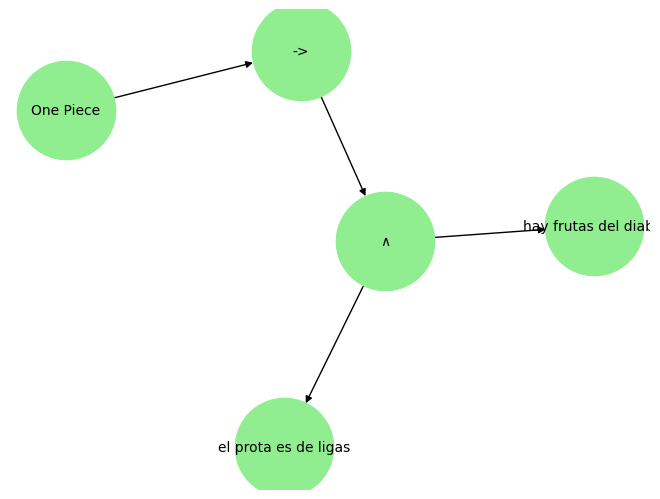

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

def generate_tree():
    # Crear el árbol de expresiones
    root = Node('One Piece')
    node1 = Node('->')
    node2 = Node('∧')
    node3 = Node('hay frutas del diablo')
    node4 = Node('el prota es de ligas')

    root.add_child(node1)
    node1.add_child(node2)
    node2.add_child(node3)
    node2.add_child(node4)

    return root

def visualize_tree(root):
    G = nx.DiGraph()

    def traverse(node):
        G.add_node(str(id(node)), label=node.value)
        for child in node.children:
            G.add_node(str(id(child)), label=child.value)
            G.add_edge(str(id(node)), str(id(child)))
            traverse(child)

    traverse(root)
    
    pos = nx.spring_layout(G, k=0.5, scale=2)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=5000, node_color='lightgreen', font_size=10, font_color='black')
    plt.show()

# Generar y visualizar el árbol
root = generate_tree()
visualize_tree(root)


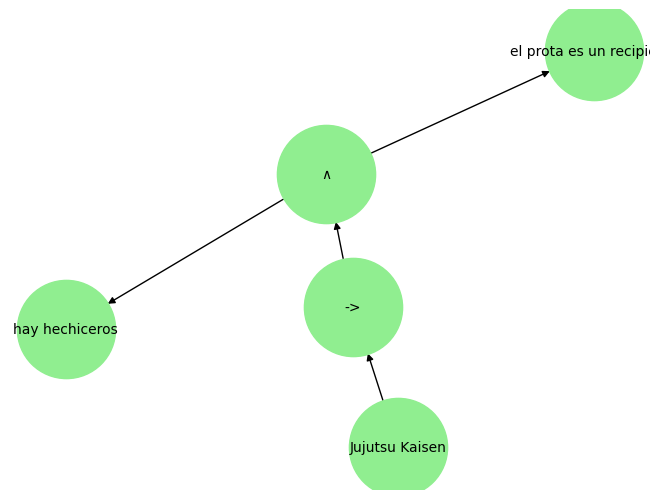

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

def generate_tree():
    # Crear el árbol de expresiones
    root = Node('Jujutsu Kaisen')
    node1 = Node('->')
    node2 = Node('∧')
    node3 = Node('hay hechiceros')
    node4 = Node('el prota es un recipiente')

    root.add_child(node1)
    node1.add_child(node2)
    node2.add_child(node3)
    node2.add_child(node4)

    return root

def visualize_tree(root):
    G = nx.DiGraph()

    def traverse(node):
        G.add_node(str(id(node)), label=node.value)
        for child in node.children:
            G.add_node(str(id(child)), label=child.value)
            G.add_edge(str(id(node)), str(id(child)))
            traverse(child)

    traverse(root)
    
    pos = nx.spring_layout(G, k=0.5, scale=2)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=5000, node_color='lightgreen', font_size=10, font_color='black')
    plt.show()

# Generar y visualizar el árbol
root = generate_tree()
visualize_tree(root)


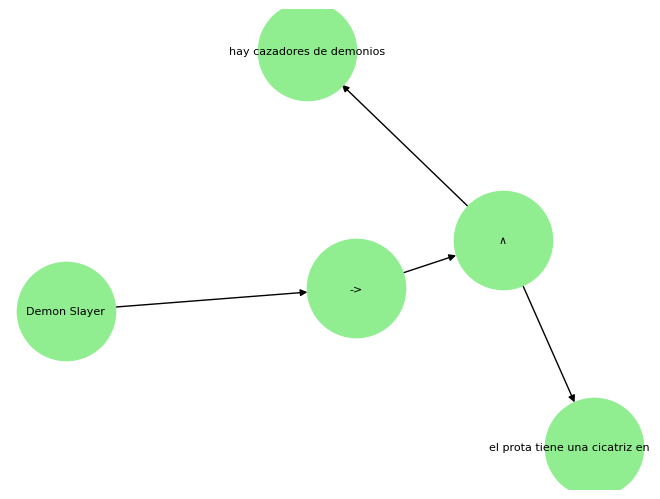

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

def generate_tree():
    # Crear el árbol de expresiones
    root = Node('Demon Slayer')
    node1 = Node('->')
    node2 = Node('∧')
    node3 = Node('hay cazadores de demonios')
    node4 = Node('el prota tiene una cicatriz en la frente')

    root.add_child(node1)
    node1.add_child(node2)
    node2.add_child(node3)
    node2.add_child(node4)

    return root

def visualize_tree(root):
    G = nx.DiGraph()

    def traverse(node):
        G.add_node(str(id(node)), label=node.value)
        for child in node.children:
            G.add_node(str(id(child)), label=child.value)
            G.add_edge(str(id(node)), str(id(child)))
            traverse(child)

    traverse(root)
    
    pos = nx.spring_layout(G, k=0.5, scale=2)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=5000, node_color='lightgreen', font_size=8, font_color='black')
    plt.show()

# Generar y visualizar el árbol
root = generate_tree()
visualize_tree(root)


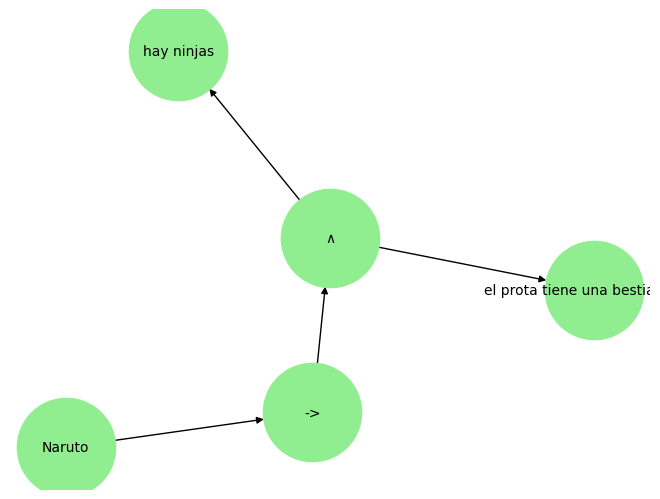

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

def generate_tree():
    # Crear el árbol de expresiones
    root = Node('Naruto')
    node1 = Node('->')
    node2 = Node('∧')
    node3 = Node('hay ninjas')
    node4 = Node('el prota tiene una bestia dentro')

    root.add_child(node1)
    node1.add_child(node2)
    node2.add_child(node3)
    node2.add_child(node4)

    return root

def visualize_tree(root):
    G = nx.DiGraph()

    def traverse(node):
        G.add_node(str(id(node)), label=node.value)
        for child in node.children:
            G.add_node(str(id(child)), label=child.value)
            G.add_edge(str(id(node)), str(id(child)))
            traverse(child)

    traverse(root)
    
    pos = nx.spring_layout(G, k=0.5, scale=2)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=5000, node_color='lightgreen', font_size=10, font_color='black')
    plt.show()

# Generar y visualizar el árbol
root = generate_tree()
visualize_tree(root)


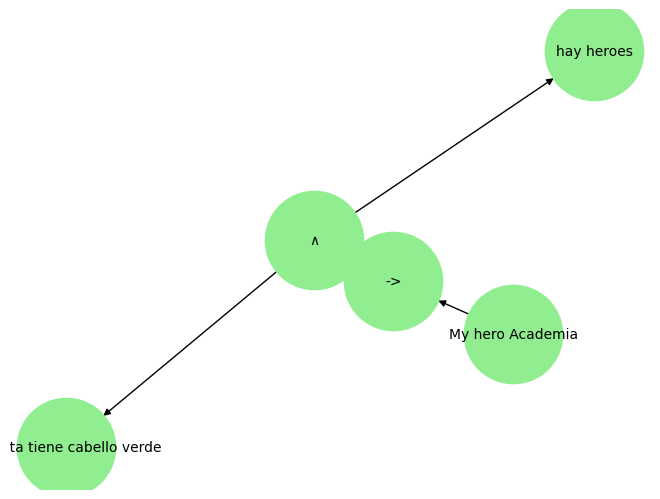

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

def generate_tree():
    # Crear el árbol de expresiones
    root = Node('My hero Academia')
    node1 = Node('->')
    node2 = Node('∧')
    node3 = Node('hay heroes')
    node4 = Node('el prota tiene cabello verde')

    root.add_child(node1)
    node1.add_child(node2)
    node2.add_child(node3)
    node2.add_child(node4)

    return root

def visualize_tree(root):
    G = nx.DiGraph()

    def traverse(node):
        G.add_node(str(id(node)), label=node.value)
        for child in node.children:
            G.add_node(str(id(child)), label=child.value)
            G.add_edge(str(id(node)), str(id(child)))
            traverse(child)

    traverse(root)
    
    pos = nx.spring_layout(G, k=0.5, scale=2)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=5000, node_color='lightgreen', font_size=10, font_color='black')
    plt.show()

# Generar y visualizar el árbol
root = generate_tree()
visualize_tree(root)
